- Error: i(true-predicted) from `1 to n / n`
- Squared Error: `i(true-predicted)^2 from 1 to n / n`
- Binary Cross Entropy Loss: Measures how well the predicted probabilities match the true binary labels.
    - Define the true labels and predicted possibilities
    - loss: `-(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()`
        - A: `y_true * np.log(y_pred)` (np.log = natural log)
        - B: `(1 - y_true) * np.log(1 - y_pred)` (np.log = natural log)
        - C: `-A+B`
        - loss <- `mean(C)`
- Categorical Cross Entropy Loss:
    - loss: `-1*np.sum(np.sum(y_true*np.log(y_pred)))` or `-(y_true*np.log(y_pred).sum())`
        - A: `np.log(y_pred)`: Calculates natural log of each element in the array.
        - B: `y_true*A`: Calculates element-wise multiplication between `y_true & A`
        - C: `np.sum(B)`: Inner np.sum() calculates entropy loss for each data point, `[0,1,0]: 0+1+0=1`
        - D: `np.sum(C)`: Outer np.sum() totals the results from the previous individual data points.
        - loss <- `sum(D)`

In [26]:
# Task: Calculate Categorical Cross Entropy Loss

import numpy as np
y_true_list=[[[0,1,0],[0,0,1],[1,0,0]],
        [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
        [[0, 0, 1], [1, 0, 0], [0, 1, 0]]]

y_pred_list=[[[0.8, 0.1, 0.1], [0.2, 0.3, 0.5], [0.1, 0.6, 0.3]],
        [[0.7, 0.2, 0.1], [0.1, 0.8, 0.1], [0.2, 0.3, 0.5]],
        [[0.1, 0.2, 0.7], [0.6, 0.3, 0.1], [0.2, 0.5, 0.3]]]

for index in range(len(y_true_list)):
    y_true = y_true_list[index]
    y_pred = y_pred_list[index]

    loss = -1*np.sum(np.sum(y_true*np.log(y_pred)))
    print(f'Test Case {index+1}: {loss}')

Test Case 1: 5.298317366548036
Test Case 2: 1.2729656758128876
Test Case 3: 1.5606477482646683


Activation Function: An activation function in a deep learning model is a mathematical function that determines whether a neuron should be activated or not. It basically decides if the input to the neuron is significant enough to be passed on to the next layer of the network. Without activation functions, a neural network would be essentially just a linear regression model, regardless of how many layers it has.
- Sigmoid: This function limits the output between 0 and 1.
    - x = np.linspace(-10,10,100)
    - y = 1/(1+np.exp(-x))

In [27]:
# Import statements for functions
import numpy as np
import matplotlib.pyplot as plt

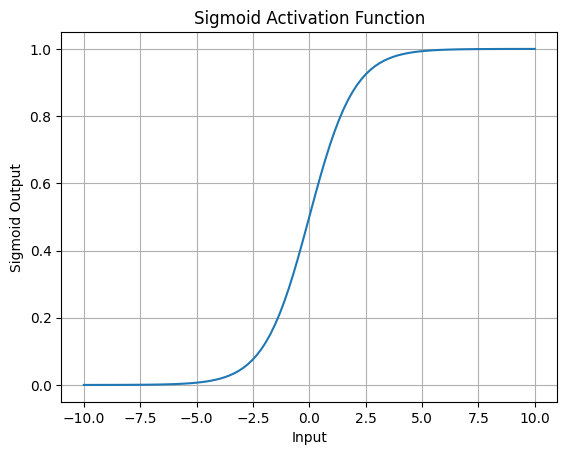

In [ ]:
# Task: Sigmoid Activation Function
def plot_sigmoid():
    x = np.linspace(-10,10,100)
    y = 1/(1+np.exp(-x))

    # plt.plot(limit of x-axis (here, is it -10 to 10 with 100 intervals in between), what to plot)
    plt.plot(x,y)
    plt.xlabel('Input')
    plt.ylabel('Sigmoid Output')
    plt.title('Sigmoid Activation Function')
    plt.grid(True)
    plt.show()

plot_sigmoid()

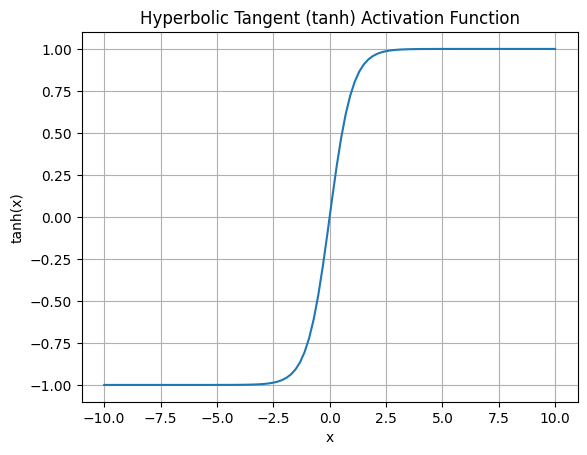

In [29]:
# Task: Tanh activation function
def plot_tanh():
    # Generate values for x
    x = np.linspace(-10, 10, 100)
    # Compute tanh values for corresponding x
    tanh = np.tanh(x)
    # Plot the tanh function
    plt.plot(x, tanh)
    plt.title("Hyperbolic Tangent (tanh) Activation Function")
    plt.xlabel("x")
    plt.ylabel("tanh(x)")
    plt.grid(True)
    plt.show()

plot_tanh()

In [30]:
# Activity: Implement the Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

vectors = np.array([[2.0, 1.0, 0.1],
                  [1.0, 2.0, 3.0],
                  [0.5, 0.5, 0.5]])

for vector in vectors:
    print(softmax(vector))

[0.65900114 0.24243297 0.09856589]
[0.09003057 0.24472847 0.66524096]
[0.33333333 0.33333333 0.33333333]


- Functions:
    - `np.maximum(0,x)`: Compare each element of `x` to `0`, return the larger value
    - `np.where(x>0,x,alpha*x)`: For each `x`, check if `x>0`. If true, return `x`, otherwise (if false) return `alpha*x`.
- For Leaky ReLU, we can't directly input the array `vector` because they're of different sizes. We need to:
    1. Iterate over each `vector` individually.
    2. Extract element by element.
    3. Send it to the function `leaky_relu()`.
    4. Get it back, append it to a new array `leaky_relu_out[]`.

In [31]:
# Activity: Implement ReLU & Leaky ReLU

def relu(x):
    # np.maximum(0,arr2):
    return np.maximum(0,x)

def leaky_relu(x,alpha):
    # np.where(condition, true statement, false statement)
    return np.where(x>0,x,alpha*x)

data = [[-1,0,1],
        [-2, -1, 0, 1, 2],
        [0.5, -0.5, 2, -2]]
# object type accomodates varying lengths
vectors = np.array(data,dtype=object)

# Print ReLU
for vector in vectors:
    print(relu(vector))

print()

# Print Leaky ReLU
alpha = 0.01
for vector in vectors:
    leaky_relu_out = []
    for element in vector:
        leaky_relu_out.append(leaky_relu(element,alpha))
    print(np.array(leaky_relu_out))

[0 0 1]
[0 0 0 1 2]
[0.5 0.  2.  0. ]

[-0.01  0.    1.  ]
[-0.02 -0.01  0.    1.    2.  ]
[ 0.5   -0.005  2.    -0.02 ]
